<div align="center">
 
  <h1 style="color: #4A4A4A;">Trent University</h1>
  <h2 style="color: #6A6A6A;">School of Graduate Studies</h2>
  <hr style="width: 50%; border-top: 2px solid #4A4A4A;">
</div>

<h2 style="color: #008080; text-align: center;">Source Code</h2>

<table align="center">
  <tr>
    <td><strong>Course Name:</strong></td>
    <td>AMOD-5430H - Data Visualization</td>
  </tr>
</table>

<h3 style="color: #4A4A4A; text-align: center;">Submitted By:</h3>

<table align="center">
  <tr>
    <td><strong>Sabrina Farzana</strong></td>
    <td>ID: 0792500</td>
  </tr>
  <tr>
    <td><strong>Md Abdul Ahad</strong></td>
    <td>ID: 0800060</td>
  </tr>
</table>

<p style="text-align: center; font-style: italic; color: #6A6A6A;">
  Date of Submission: July 15, 2024
</p>

<div style="text-align: center; margin-top: 20px;">
  
</div>

Step 1: Import Libraries and Load Data

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

# Loading the dataset
df = pd.read_csv("/Users/a4ahad/Downloads/trent/DataVisualizationAMOD-5430H/PROJECT/Code/healthcare_dataset.csv")

# Displaying the first few rows
print(df.head().T)

                                  0                1                 2  \
Name                  Bobby JacksOn     LesLie TErRy       DaNnY sMitH   
Age                              30               62                76   
Gender                         Male             Male            Female   
Blood Type                       B-               A+                A-   
Medical Condition            Cancer          Obesity           Obesity   
Date of Admission        2024-01-31       2019-08-20        2022-09-22   
Doctor                Matthew Smith  Samantha Davies  Tiffany Mitchell   
Hospital            Sons and Miller          Kim Inc          Cook PLC   
Insurance Provider       Blue Cross         Medicare             Aetna   
Billing Amount         18856.281306     33643.327287      27955.096079   
Room Number                     328              265               205   
Admission Type               Urgent        Emergency         Emergency   
Discharge Date           2024-02-02   

Step 2: Data Overview

In [34]:
# Seeing basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [35]:

# Summary statistics for numerical features
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [36]:

# Summary statistics for categorical features
df.describe(include=['O'])

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


In [37]:

# Checking for missing values
print(df.isna().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [38]:
# Shape of the dataset
print(df.shape)



import pandas as pd

# Load the dataset into a Pandas DataFrame
original_data = pd.read_csv('F:\Summer 2024\Data Visualization\Project Proposal\Code\healthcare_dataset.csv')  # Replace with your actual file path

# Display the first few rows of the dataset to understand its structure
print(original_data.head())

# Column Removal and Renaming
# Exclude columns that are not relevant for analysis
columns_to_exclude = ['Name', 'Room Number']
data_1 = original_data.drop(columns=columns_to_exclude)

# Standardize column names by converting spaces to underscores
data_1.columns = [col.replace(' ', '_') for col in data_1.columns]

# Display the new column names to confirm changes
print(data_1.columns)

# Data Type Conversion
# Convert 'Date_of_Admission' and 'Discharge_Date' from string to datetime format
data_1['Date_of_Admission'] = pd.to_datetime(data_1['Date_of_Admission'], errors='coerce')
data_1['Discharge_Date'] = pd.to_datetime(data_1['Discharge_Date'], errors='coerce')

# Verify data types of columns to ensure correct conversion
print(data_1.dtypes)

# Save the cleaned DataFrame to a new CSV file (optional)
data_1.to_csv('path_to_cleaned_dataset.csv', index=False)  # Replace with your desired file path

# Display the first few rows of the cleaned dataset to verify changes
print(data_1.head())


(55500, 15)


Step 3: Gender-Wise Analysis of Patient Distribution

In [39]:
# Counting the number of patients by gender
gender_counts = df['Gender'].value_counts()

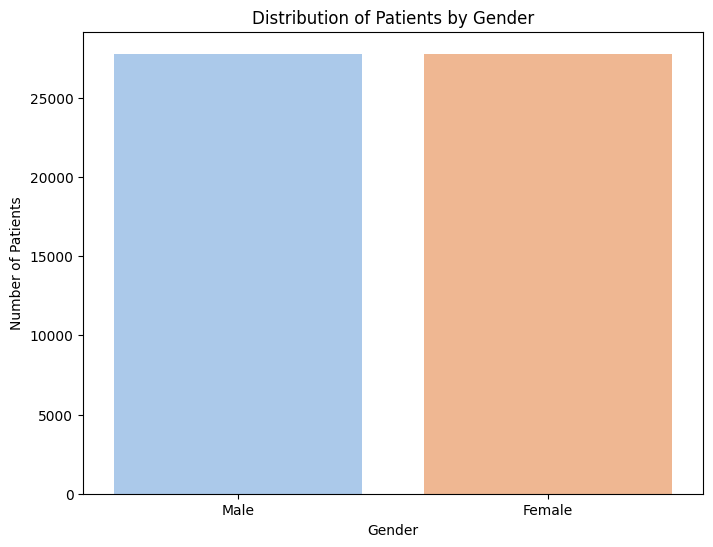

In [40]:
# Bar ploting for gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Distribution of Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

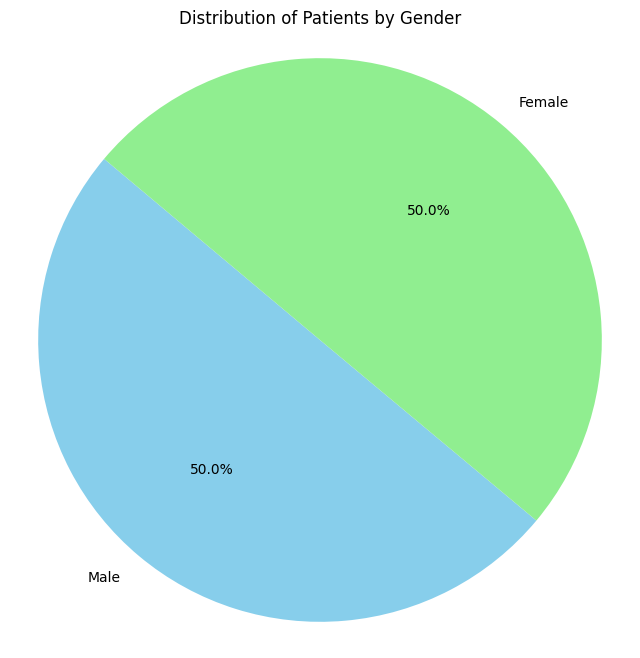

In [41]:
# Pie chart for gender distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Patients by Gender')
plt.axis('equal')
plt.show()

Step 4: Medical Condition Analysis

In [42]:
# Counting occurrences of each medical condition
medical_condition_counts = df['Medical Condition'].value_counts()

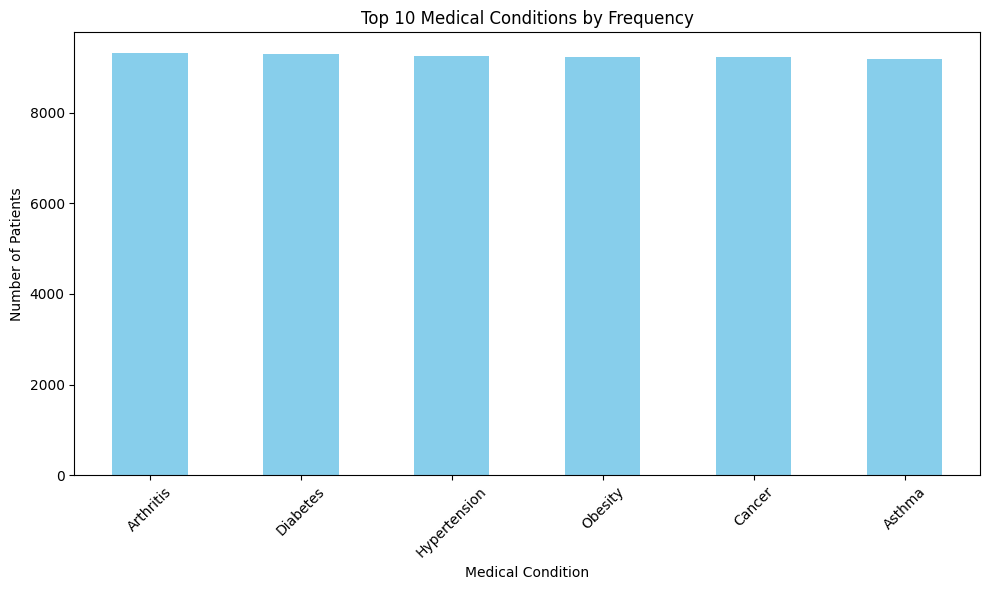

In [43]:
# Bar plot for top 10 medical conditions
plt.figure(figsize=(10, 6))
medical_condition_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Medical Conditions by Frequency')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

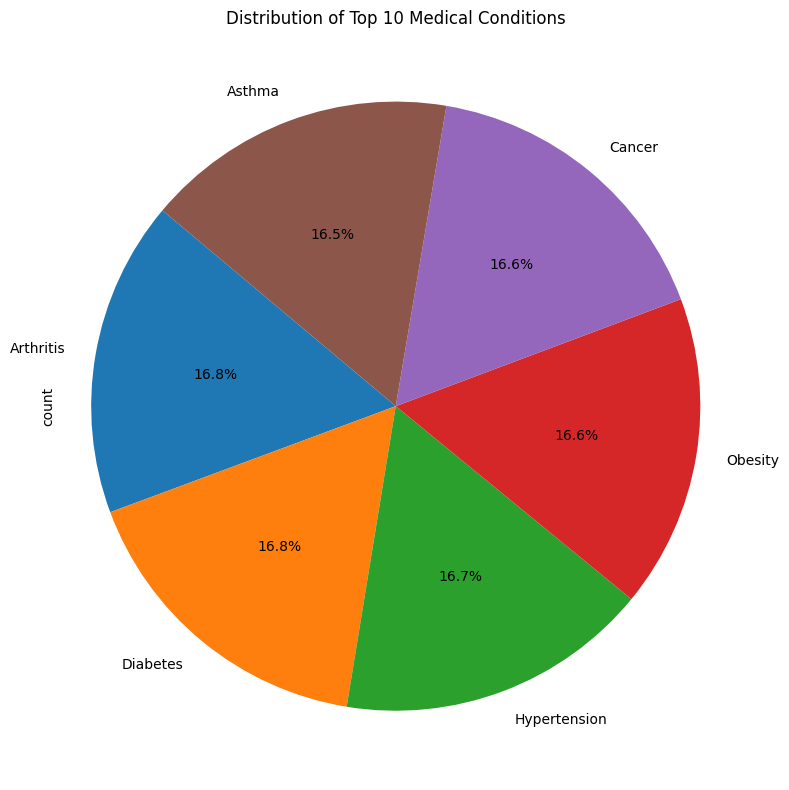

In [44]:
# Pie chart for top 10 medical conditions
plt.figure(figsize=(8, 8))
medical_condition_counts.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Medical Conditions')
plt.axis('equal')
plt.tight_layout()
plt.show()


Step 5: Blood Type Distribution

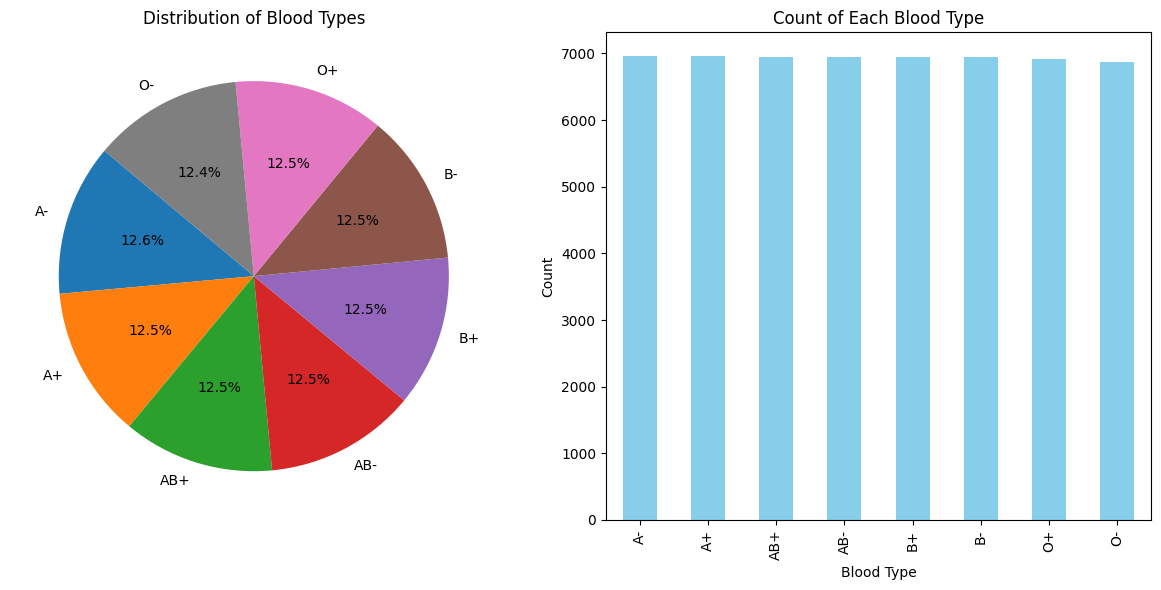

In [49]:
# Counting occurrences of each blood type
blood_type_counts = df['Blood Type'].value_counts()

# Pie chart and bar chart for blood type distribution
plt.figure(figsize=(12, 6))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(blood_type_counts, labels=blood_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Blood Types')

# Bar chart
plt.subplot(1, 2, 2)
blood_type_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Blood Type')
plt.xlabel('Blood Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Step 6: Insurance Provider Analysis

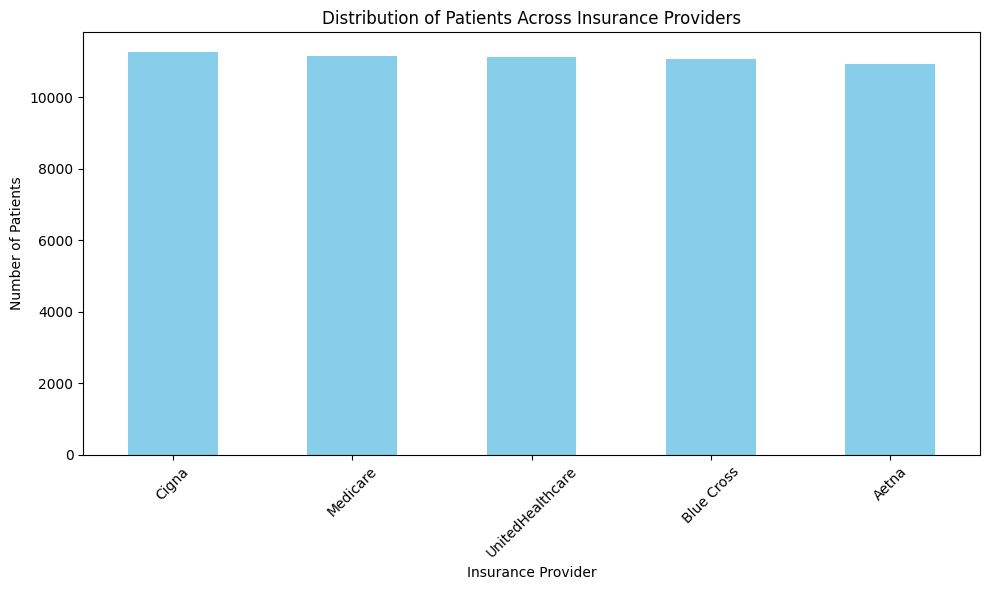

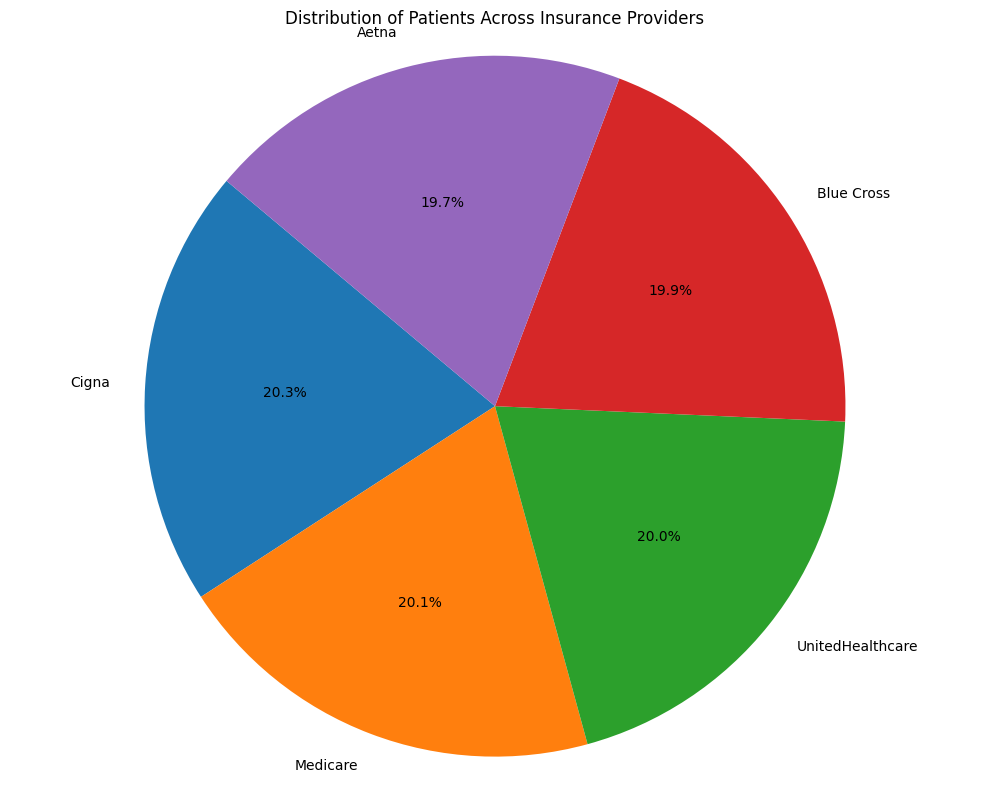

In [50]:
# Counting occurrences of each insurance provider
insurance_counts = df['Insurance Provider'].value_counts()

# Bar plot for insurance provider distribution
plt.figure(figsize=(10, 6))
insurance_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Patients Across Insurance Providers')
plt.xlabel('Insurance Provider')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie chart for insurance provider distribution
plt.figure(figsize=(10, 8))
plt.pie(insurance_counts, labels=insurance_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Patients Across Insurance Providers')
plt.axis('equal')
plt.tight_layout()
plt.show()


Step 7: Medication Analysis

In [52]:
# Counting occurrences of each medication
medication_counts = df['Medication'].value_counts()

# Top 10 medications by frequency
top_medications = medication_counts.head(10)

# Displaying the top medications
print("Top 10 Most Commonly Prescribed Medications:")
print(top_medications)

Top 10 Most Commonly Prescribed Medications:
Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64


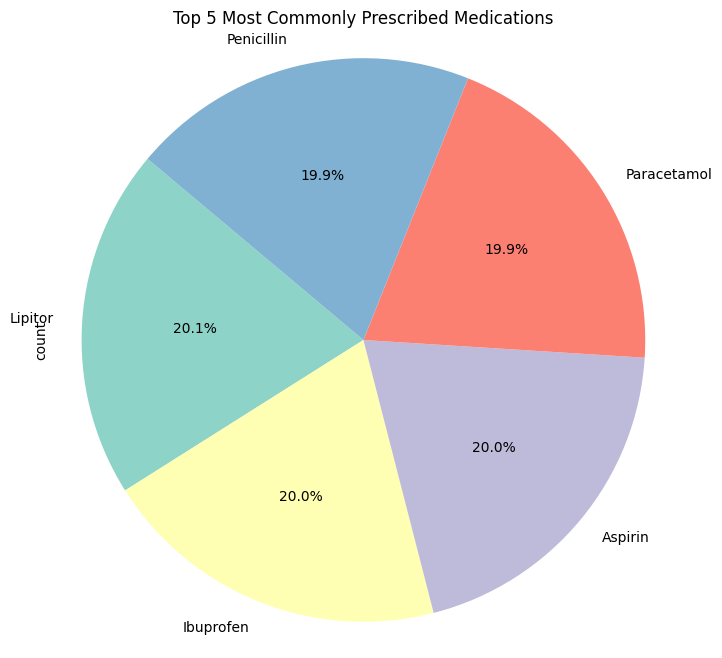

In [53]:
# Pie chart for top 5 medications
plt.figure(figsize=(8, 8))
top_medications.head(5).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 5 Most Commonly Prescribed Medications')
plt.axis('equal')
plt.show()

Step 8: Regression Analysis between Age and Medical Conditions

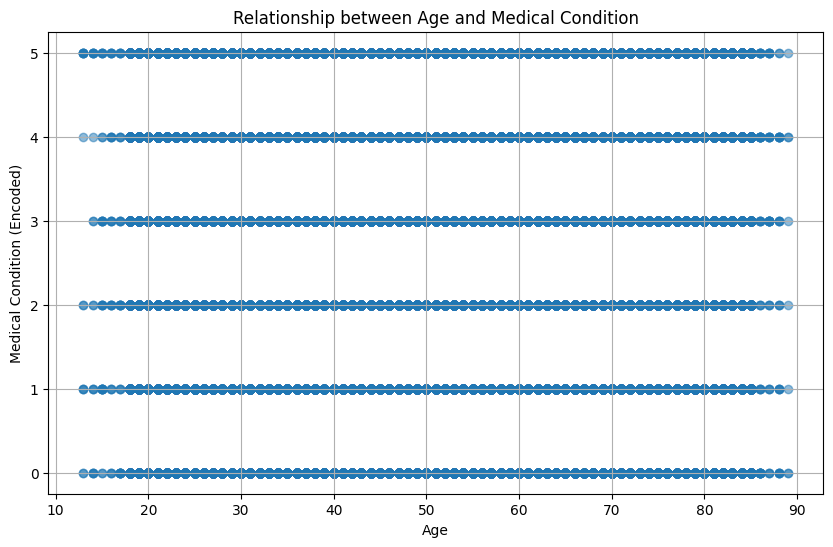

In [55]:
# Ensuring 'Age' and 'Medical Condition' columns exist
assert 'Age' in df.columns and 'Medical Condition' in df.columns, "Ensure 'Age' and 'Medical Condition' columns exist in your dataset."

# Converting 'Medical Condition' to numerical labels
label_encoder = LabelEncoder()
df['Medical Condition'] = label_encoder.fit_transform(df['Medical Condition'])

# Scatter plot: Age vs Medical Condition
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Medical Condition'], alpha=0.5)
plt.title('Relationship between Age and Medical Condition')
plt.xlabel('Age')
plt.ylabel('Medical Condition (Encoded)')
plt.grid(True)
plt.show()


Regression Equation: Medical Condition = -0.00 * Age + 2.51


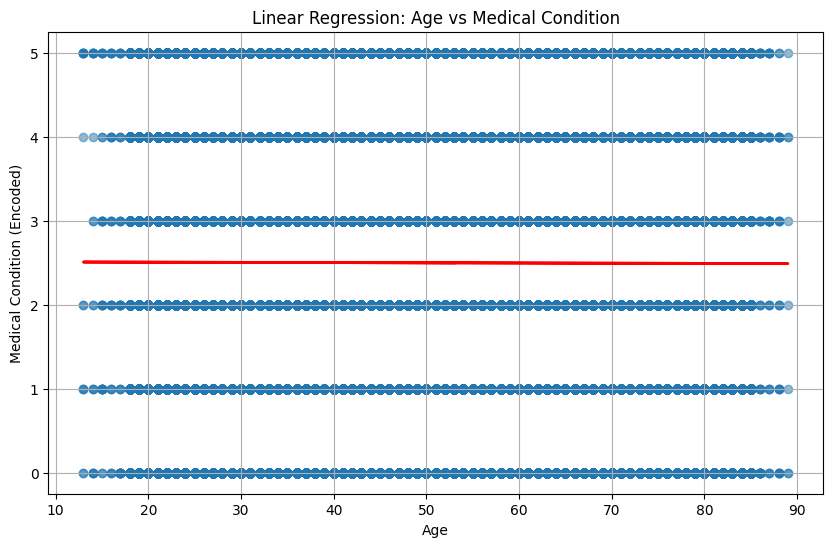

In [56]:

# Regression Analysis
X = df[['Age']]
y = df['Medical Condition']

model = LinearRegression()
model.fit(X, y)

# Getting coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Printing regression equation
print(f"Regression Equation: Medical Condition = {slope:.2f} * Age + {intercept:.2f}")

# Plotting regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Linear Regression: Age vs Medical Condition')
plt.xlabel('Age')
plt.ylabel('Medical Condition (Encoded)')
plt.grid(True)
plt.show()


Step 9: ANOVA Test

In [57]:
# Converting 'Medical Condition' to numeric format (label encoding)
df['Medical Condition'] = pd.factorize(df['Medical Condition'])[0]

# Grouping by Age and collect 'Medical Condition'
anova_age = df.groupby('Age')['Medical Condition'].apply(list)

# Performing ANOVA
f_statistic, p_value = f_oneway(*anova_age.values)
print(f"ANOVA Results for Age Groups: F = {f_statistic}, p = {p_value}")

# Interpreting Results
if p_value < 0.05:
    print("There is a significant difference in medical conditions across different age groups.")
else:
    print("There is no significant difference in medical conditions across different age groups.")


ANOVA Results for Age Groups: F = 0.9280509814203598, p = 0.6554233892595381
There is no significant difference in medical conditions across different age groups.


Step 10: Chi-Square Independence Test

In [58]:
# Contingency table for insurance providers vs. medical conditions
contingency_table = pd.crosstab(df['Insurance Provider'], df['Medical Condition'])

# Performing Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Printing Chi-Square results
print(f"Chi-Square Results for Medical Conditions across Insurance Providers:")
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpreting the results
alpha = 0.05
if p_value < alpha:
    print("There are significant differences in medical conditions across insurance providers.")
else:
    print("There are no significant differences in medical conditions across insurance providers.")

# Contingency table for gender vs. medical conditions
contingency_table = pd.crosstab(df['Gender'], df['Medical Condition'])

# Performing Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Printing Chi-Square results
print(f"Chi-Square Results for Medical Conditions across Genders:")
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpreting the results
if p_value < alpha:
    print("There are significant differences in medical conditions across genders.")
else:
    print("There are no significant differences in medical conditions across genders.")


Chi-Square Results for Medical Conditions across Insurance Providers:
Chi-Square statistic: 14.478233090141817
P-value: 0.8054447875790507
There are no significant differences in medical conditions across insurance providers.
Chi-Square Results for Medical Conditions across Genders:
Chi-Square statistic: 1.2017873650693678
P-value: 0.9447057765170073
There are no significant differences in medical conditions across genders.
